<a href="https://colab.research.google.com/github/Nethu-Dilrangi/toyota-stock-analysis/blob/main/Toyota_Motor_Corporation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [6]:
print("Extracting data from Yahoo Finance...")
vehicle_data = yf.download('TM', start='2023-01-01', end='2025-12-22')
print(f"Data extracted successfully! Shape: {vehicle_data.shape}")

Extracting data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed

Data extracted successfully! Shape: (745, 5)


In [7]:
vehicle_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM
Date,,,,,
2023-01-03,128.386093,128.562501,127.216251,128.088996,309800
2023-01-04,127.374069,128.497486,126.872698,128.321092,467100
2023-01-05,125.823547,126.492032,125.034359,126.009235,178400
2023-01-06,129.026718,129.555927,126.185663,126.399203,164900
2023-01-09,129.927307,131.524242,129.277395,129.342379,229900


In [8]:
print("\nPreprocessing data...")
df = vehicle_data.copy()
df.columns = df.columns.map(lambda x: x[0] if isinstance(x, tuple) else x)


Preprocessing data...


In [9]:
print(f"Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [10]:
df.fillna(method='ffill', inplace=True)
df

,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,128.386093,128.562501,127.216251,128.088996,309800
2023-01-04,127.374069,128.497486,126.872698,128.321092,467100
2023-01-05,125.823547,126.492032,125.034359,126.009235,178400
2023-01-06,129.026718,129.555927,126.185663,126.399203,164900
2023-01-09,129.927307,131.524242,129.277395,129.342379,229900
...,...,...,...,...,...
2025-12-15,214.809998,216.429993,214.429993,215.250000,412000
2025-12-16,214.419998,216.029999,214.000000,214.000000,292700
2025-12-17,214.240005,216.149994,214.179993,214.600006,223600


In [11]:
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2023-01-03,128.386093,128.562501,127.216251,128.088996,309800
1,2023-01-04,127.374069,128.497486,126.872698,128.321092,467100
2,2023-01-05,125.823547,126.492032,125.034359,126.009235,178400
3,2023-01-06,129.026718,129.555927,126.185663,126.399203,164900
4,2023-01-09,129.927307,131.524242,129.277395,129.342379,229900


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [13]:
df['SMA_30'] = df['Close'].rolling(window=20).mean()
df[['Date', 'Close', 'SMA_30']].head(15)

,Date,Close,SMA_30
0,2023-01-03,128.386093,NaN
1,2023-01-04,127.374069,NaN
2,2023-01-05,125.823547,NaN
3,2023-01-06,129.026718,NaN
4,2023-01-09,129.927307,NaN
5,2023-01-10,129.184555,NaN
6,2023-01-11,128.915314,NaN
7,2023-01-12,132.174149,NaN
8,2023-01-13,130.261551,NaN
9,2023-01-17,134.411728,NaN


In [14]:
df['EMA_30'] = df['Close'].ewm(span=20, adjust=False).mean()
df[['Date', 'Close', 'EMA_30']].head(15)


,Date,Close,EMA_30
0,2023-01-03,128.386093,128.386093
1,2023-01-04,127.374069,128.289710
2,2023-01-05,125.823547,128.054837
3,2023-01-06,129.026718,128.147397
4,2023-01-09,129.927307,128.316913
5,2023-01-10,129.184555,128.399545
6,2023-01-11,128.915314,128.448666
7,2023-01-12,132.174149,128.803474
8,2023-01-13,130.261551,128.942338
9,2023-01-17,134.411728,129.463233


In [15]:
df['VMA_30'] = df['Volume'].rolling(window=20).mean()
df[['Date', 'Volume', 'VMA_30']].head(25)

,Date,Volume,VMA_30
0,2023-01-03,309800,NaN
1,2023-01-04,467100,NaN
2,2023-01-05,178400,NaN
3,2023-01-06,164900,NaN
4,2023-01-09,229900,NaN
5,2023-01-10,231100,NaN
6,2023-01-11,251000,NaN
7,2023-01-12,242800,NaN
8,2023-01-13,291500,NaN
9,2023-01-17,383700,NaN


In [16]:
df.to_csv("TM_with_SMA_EMA_VMA.csv", index=False)
from google.colab import files
files.download("TM_with_SMA_EMA_VMA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

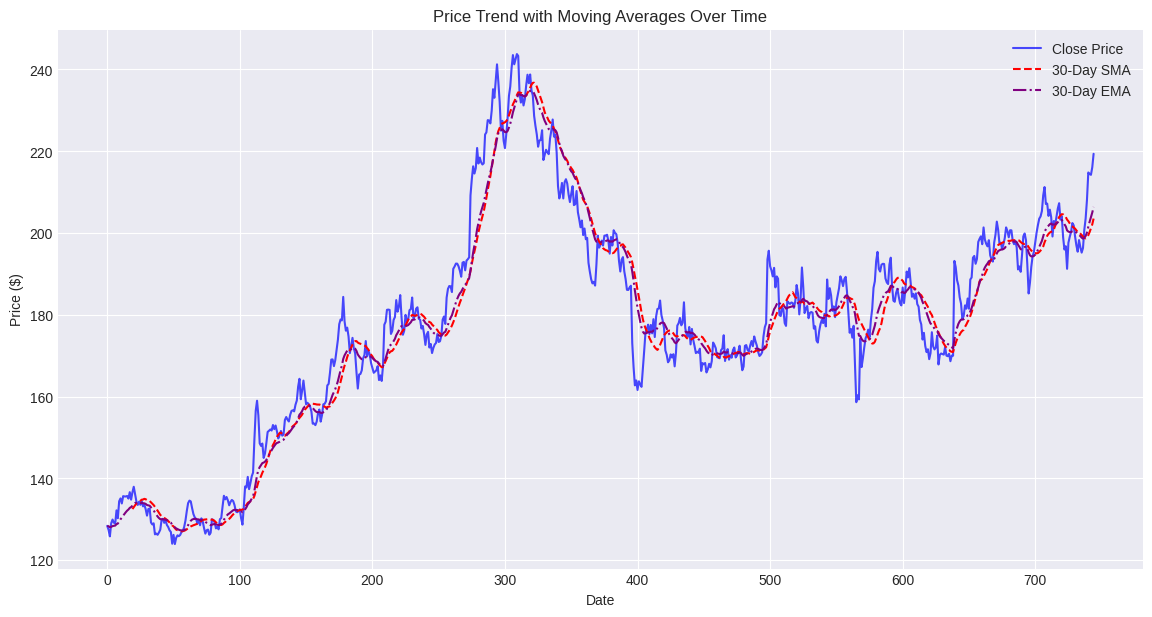

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(df.index, df['SMA_30'], label='30-Day SMA', color='red', linestyle='--')
plt.plot(df.index, df['EMA_30'], label='30-Day EMA', color='purple', linestyle='-.')
plt.title('Price Trend with Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.savefig('Price Trend with Moving Averages Over Time.png')

plt.show()

In [18]:
df['Daily_Price_Change'] = df['Close'] - df['Open']
df['Daily_Return'] = df['Close'].pct_change() * 100
df['High_Low_Spread'] = df['High'] - df['Low']
df['Volume_Millions'] = df['Volume'] / 1000000
df['Volatility'] = df['High'] - df['Low']
display(df.head())

,Date,Close,High,Low,Open,Volume,SMA_30,EMA_30,VMA_30,Daily_Price_Change,Daily_Return,High_Low_Spread,Volume_Millions,Volatility
0,2023-01-03,128.386093,128.562501,127.216251,128.088996,309800,NaN,128.386093,NaN,0.297097,NaN,1.346250,0.3098,1.346250
1,2023-01-04,127.374069,128.497486,126.872698,128.321092,467100,NaN,128.289710,NaN,-0.947023,-0.788266,1.624788,0.4671,1.624788
2,2023-01-05,125.823547,126.492032,125.034359,126.009235,178400,NaN,128.054837,NaN,-0.185687,-1.217298,1.457673,0.1784,1.457673
3,2023-01-06,129.026718,129.555927,126.185663,126.399203,164900,NaN,128.147397,NaN,2.627516,2.545764,3.370264,0.1649,3.370264
4,2023-01-09,129.927307,131.524242,129.277395,129.342379,229900,NaN,128.316913,NaN,0.584928,0.697986,2.246848,0.2299,2.246848


In [19]:
df.dropna(subset=['Close'], inplace=True)
print(f"Preprocessed data shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
df

Preprocessed data shape: (745, 14)
Date range: 0 to 744


,Date,Close,High,Low,Open,Volume,SMA_30,EMA_30,VMA_30,Daily_Price_Change,Daily_Return,High_Low_Spread,Volume_Millions,Volatility
0,2023-01-03,128.386093,128.562501,127.216251,128.088996,309800,NaN,128.386093,NaN,0.297097,NaN,1.346250,0.3098,1.346250
1,2023-01-04,127.374069,128.497486,126.872698,128.321092,467100,NaN,128.289710,NaN,-0.947023,-0.788266,1.624788,0.4671,1.624788
2,2023-01-05,125.823547,126.492032,125.034359,126.009235,178400,NaN,128.054837,NaN,-0.185687,-1.217298,1.457673,0.1784,1.457673
3,2023-01-06,129.026718,129.555927,126.185663,126.399203,164900,NaN,128.147397,NaN,2.627516,2.545764,3.370264,0.1649,3.370264
4,2023-01-09,129.927307,131.524242,129.277395,129.342379,229900,NaN,128.316913,NaN,0.584928,0.697986,2.246848,0.2299,2.246848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,2025-12-15,214.809998,216.429993,214.429993,215.250000,412000,199.4770,201.524269,306100.0,-0.440002,3.214493,2.000000,0.4120,2.000000
741,2025-12-16,214.419998,216.029999,214.000000,214.000000,292700,200.2480,202.752434,309025.0,0.419998,-0.181556,2.029999,0.2927,2.029999
742,2025-12-17,214.240005,216.149994,214.179993,214.600006,223600,201.1620,203.846489,307175.0,-0.360001,-0.083944,1.970001,0.2236,1.970001
743,2025-12-18,216.080002,217.500000,215.440002,216.509995,352000,202.1270,205.011585,316465.0,-0.429993,0.858848,2.059998,0.3520,2.059998


In [20]:
min_close_price = df['Close'].min()
max_close_price = df['Close'].max()
mean_close_price = df['Close'].mean()
total_volume = df['Volume'].sum() / 1_000_000_000

print(f"Minimum Close Price: {min_close_price:.2f}")
print(f"Maximum Close Price: {max_close_price:.2f}")
print(f"Mean Close Price: {mean_close_price:.2f}")
print(f"Total Volume: {total_volume:.2f}")

Minimum Close Price: 123.93
Maximum Close Price: 243.76
Mean Close Price: 177.67
Total Volume: 0.25


In [21]:
data_summary = pd.DataFrame({
    'Metric': [
        'Minimum Close Price',
        'Maximum Close Price',
        'Mean Close Pricee',
        'Total Volume '
    ],
    'Value': [
       min_close_price,
       max_close_price,
       mean_close_price,
       total_volume
    ]
})
print("Data Summary:")
data_summary

Data Summary:


,Metric,Value
0,Minimum Close Price,123.929504
1,Maximum Close Price,243.764053
2,Mean Close Pricee,177.667987
3,Total Volume,0.246010


### ***SEPARATE GRAPHS***

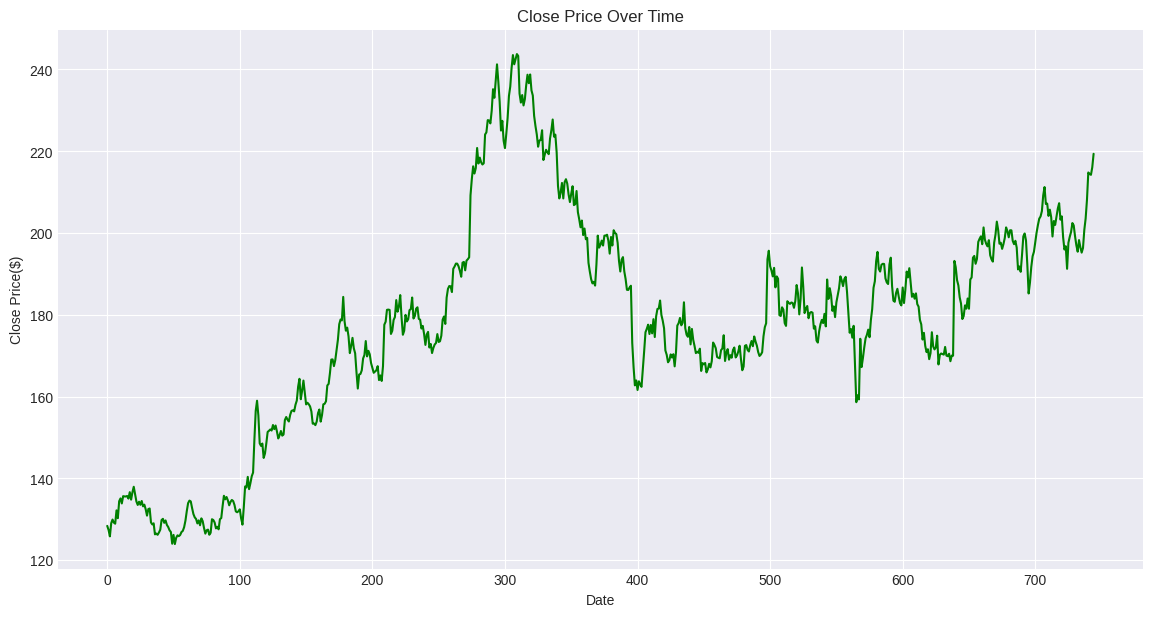

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='green')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price($)')
plt.savefig('Line Chart - Toyota Motor price Trend.png', dpi=100)
plt.show()

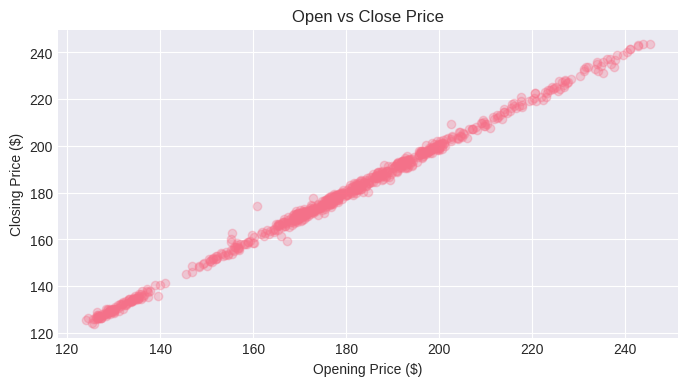

In [23]:
plt.figure(figsize=(8, 4))
plt.scatter(df['Open'], df['Close'], alpha=0.3)
plt.title('Open vs Close Price')
plt.xlabel('Opening Price ($)')
plt.ylabel('Closing Price ($)')
plt.savefig('Scatter Plot - Opens Vs Close Price.png')
plt.show()


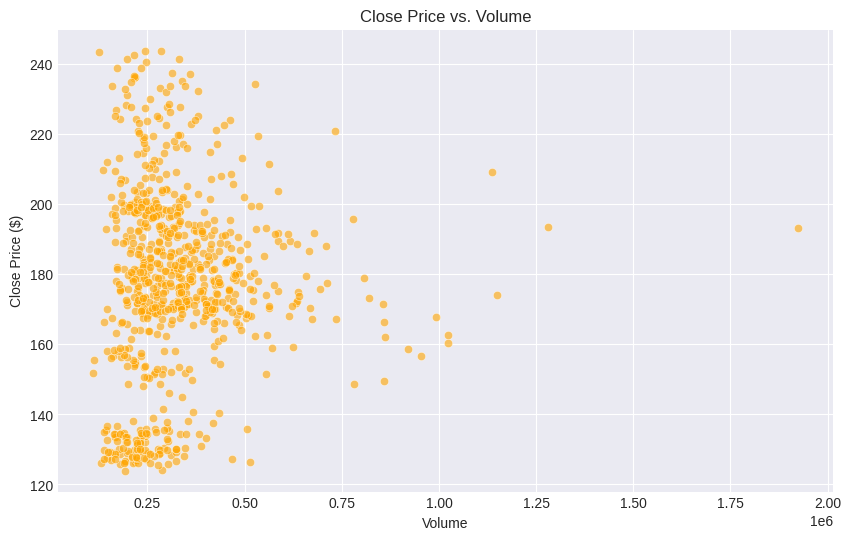

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.6, color='orange')
plt.title('Close Price vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price ($)')
plt.savefig('Scatter Plot - Close Price Vs Volume.png')
plt.show()

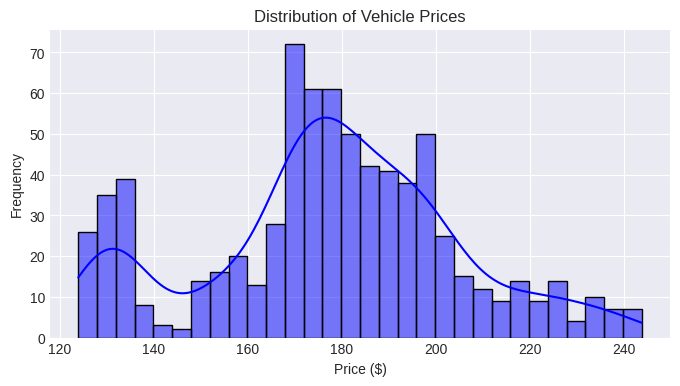

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Close'], bins=30, kde=True, color='blue')
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.savefig('Histrogram - Distribustion of Pirces.png')
plt.show()

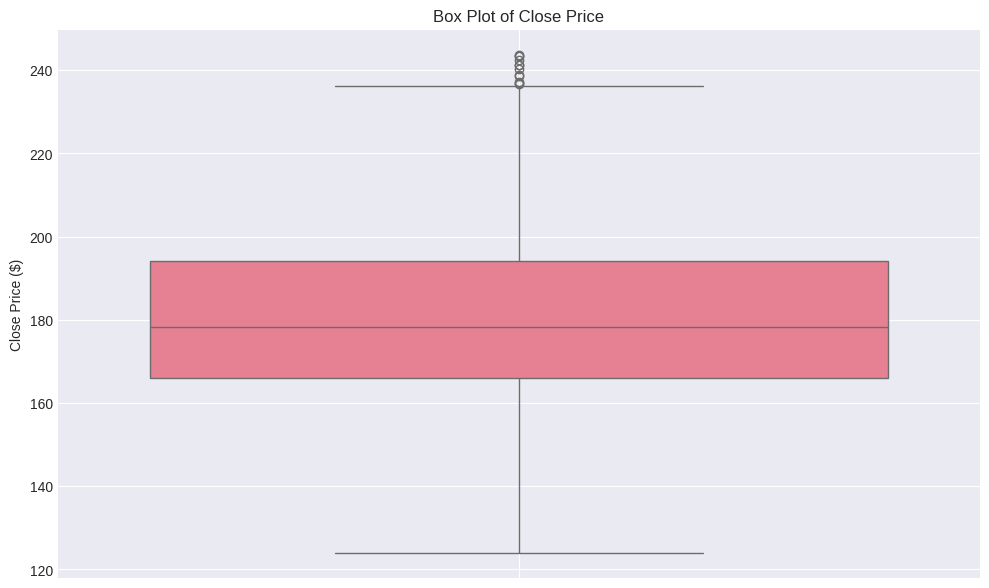

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Close'])
plt.title('Box Plot of Close Price')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.tight_layout()
plt.savefig('Box Plot of Close Price.png')
plt.show()

# ***VISUALIZATIONS***

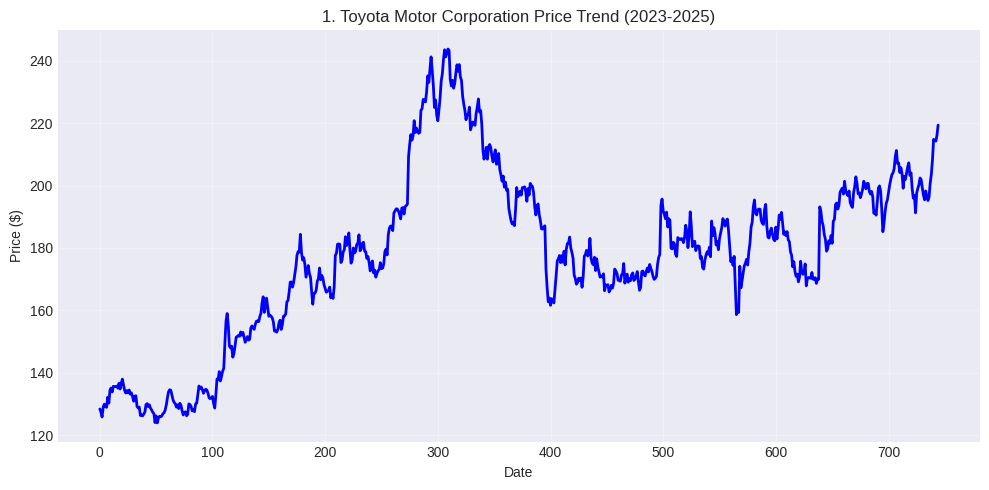

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], color='blue', linewidth=2)
plt.title('1. Toyota Motor Corporation Price Trend (2023-2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Line Chart - Toyota Motor  Price Trend.png', dpi=100)
plt.show()

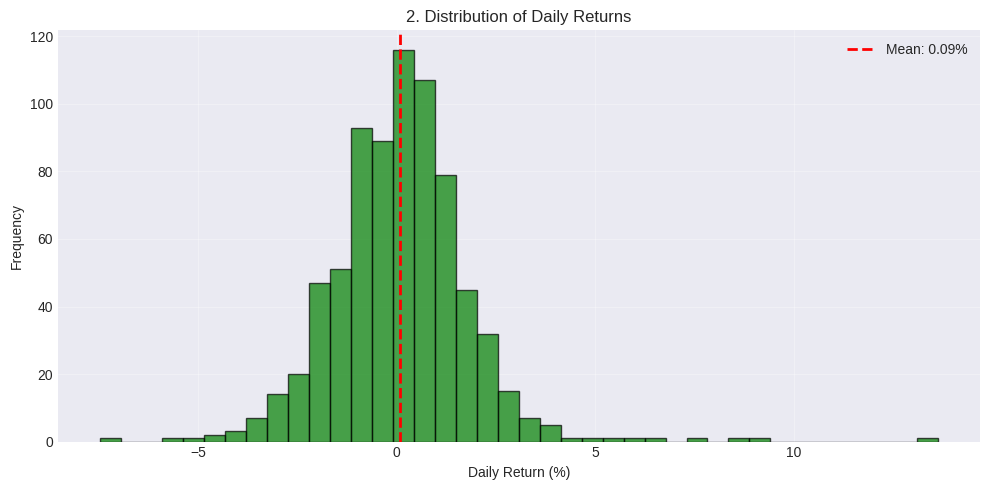

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(df['Daily_Return'], bins=40, color='green', edgecolor='black', alpha=0.7)
plt.title('2. Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
mean_return = df['Daily_Return'].mean()
plt.axvline(mean_return, color='red', linestyle='--', linewidth=2,
label=f'Mean: {mean_return:.2f}%')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Histrogram - Daily Returns.png', dpi=100)
plt.show()

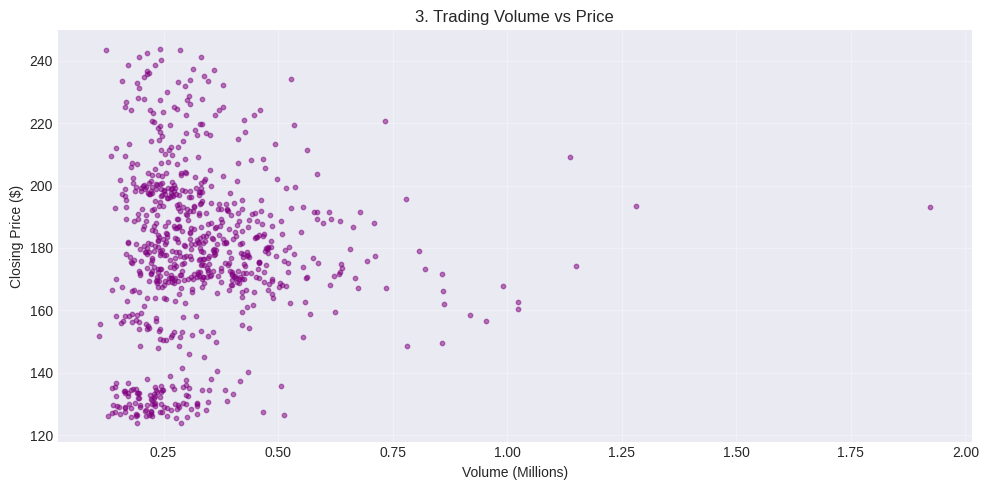

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Volume_Millions'], df['Close'], alpha=0.5, s=10, color='purple')
plt.title('3. Trading Volume vs Price')
plt.xlabel('Volume (Millions)')
plt.ylabel('Closing Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Scatter plot - Volume Vs Price.png', dpi=100)
plt.show()

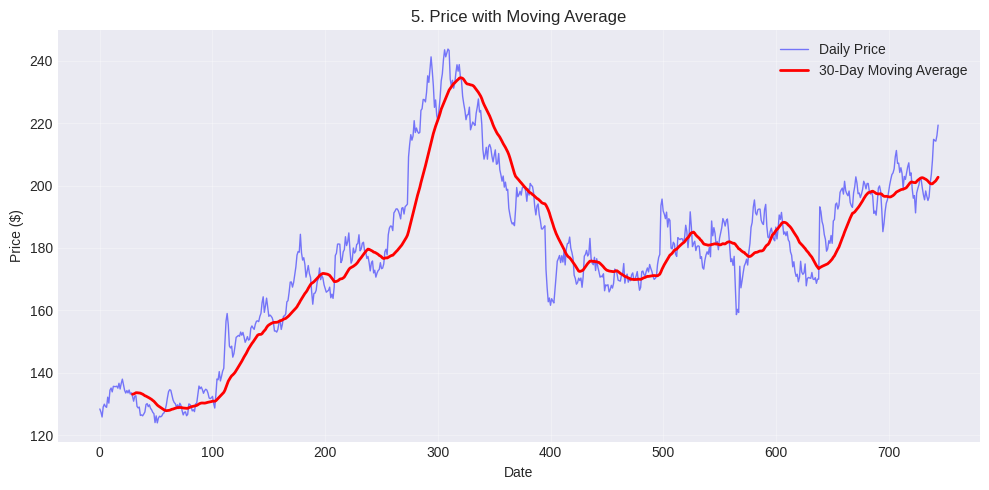

In [30]:

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], color='blue', alpha=0.5, label='Daily Price', linewidth=1)
df['30_day_MA'] = df['Close'].rolling(window=30).mean()
plt.plot(df.index, df['30_day_MA'], color='red', linewidth=2, label='30-Day Moving Average')
plt.title('5. Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Price Moving Average.png', dpi=100)
plt.show()


In [31]:
X = df[['Open']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
slope = model.coef_[0] if model.coef_.ndim == 1 else model.coef_[0][0]
intercept = model.intercept_ if np.isscalar(model.intercept_) else model.intercept_[0]
print(f"Model slope (coefficient): {slope:.2f}")
print(f"Model intercept: {intercept:.2f}")

Model slope (coefficient): 1.00
Model intercept: 0.06


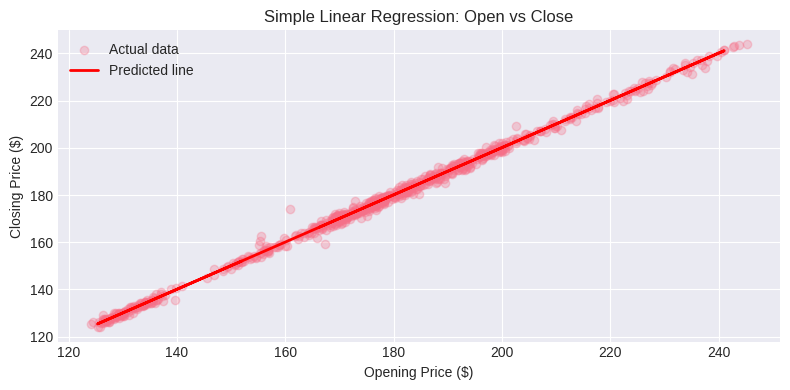

In [33]:
plt.figure(figsize=(8, 4))
plt.scatter(df['Open'], df['Close'], alpha=0.3, label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.title('Simple Linear Regression: Open vs Close')
plt.xlabel('Opening Price ($)')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.savefig('Simple Linear Regression: Open vs Close.png')
plt.tight_layout()
plt.show()

In [34]:
df.to_csv('TM.csv', index=True)

In [35]:
from google.colab import files
files.download('TM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>